<a href="https://colab.research.google.com/github/MwahMallah/EDA_trafic_accidents/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Import and Loading of the Dataset

In [1]:
from utils import load_data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
sns.set_theme(style="darkgrid")

In [2]:
df = load_data("police")
df.head()

,id,road_category,road_number,date,time,accident_type,collision_type,fixed_obstacle_type,accident_character,responsibility,...,y,geom,geog,locality_type_label,accident_type_label,collision_type_label,fixed_obstacle_type_label,accident_character_label,driver_alcohol_level,driver_alcohol_detected
0,60040220005,0.0,1.0,2022-01-31,1615,1,4,0,1,1,...,-1162781.504,01010000208A150000CFF753A3CB7222C1DD2406811DBE...,0101000020E6100000F03BB8033A863040913ACBC3DC95...,out_of_city,Moving vehicle,Rear,N/A,Injury/Fatality,no_alcohol,0
1,60040220014,0.0,1.0,2022-02-21,2560,3,0,4,2,1,...,-1162893.337,01010000208A15000096438BECF26F22C1CBA145568DBE...,0101000020E610000097E4C0798A873040825132A9C795...,in_city,Fixed object,N/A,Guardrail,Material Damage Only,not_tested,<NA>
2,60040220020,0.0,1.0,2022-04-21,405,1,4,0,1,1,...,-1162787.426,01010000208A1500000E2DB29D9A7222C104560E6D23BE...,0101000020E61000009BB32F7E50863040734B7CD0DB95...,out_of_city,Moving vehicle,Rear,N/A,Injury/Fatality,no_alcohol,0
3,60040220030,0.0,1.0,2022-05-25,1015,1,4,0,2,1,...,-1163072.147,01010000208A150000F2D24D22F96B22C1C1CAA12540BF...,0101000020E6100000A6C301996289304076A6678CA395...,in_city,Moving vehicle,Rear,N/A,Material Damage Only,no_alcohol,0
4,60040220035,0.0,1.0,2022-06-06,2150,6,0,0,2,4,...,-1163846.206,01010000208A1500007D3F359E6E0F22C17F6ABC3446C2...,0101000020E61000001D826CFB06B33040FD51FB543796...,in_city,Domestic animal,N/A,N/A,Material Damage Only,not_tested,<NA>


Dataset consists of 51 original feauters and 21805 rows of data

# General description of the Dataset

Dataset doesn't have any duplicate values

In [3]:
#check for duplicated data in dataset
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 52)


Dataset has 21805 rows and 51 original features

In [4]:
#number of rows in dataset
print("number of rows: ", df.shape[0])

number of rows:  21805


All categorical features in the dataset were originally encoded as int64 values.
During feature engineering, these features were mapped to human-readable categorical (string) representations to improve interpretability during EDA.

In [5]:
#types of data in dataset
df.dtypes

id                                 int64
road_category                    float64
road_number                      float64
date                              object
time                               int64
accident_type                      int64
collision_type                     int64
fixed_obstacle_type                int64
accident_character                 int64
responsibility                     int64
alcohol_at_driver                  int64
main_cause                         int64
fatalities                         int64
serious_injuries                   int64
minor_injuries                     int64
total_material_damage              int64
road_surface_type                  int64
road_surface_condition             int64
road_condition                     int64
weather_conditions                 int64
visibility                         int64
sight_conditions                   int64
road_division                      int64
accident_position_on_road          int64
traffic_control 

The dataset contains missing values in several features: crossing road type (p39) with 20,191 missing entries, road number (p37) with 21,042 missing entries, and vehicle year (p47) with 4,959 missing entries.

In [8]:
#number of missing values
df.isnull().sum().sort_values(ascending=False)

crossing_road_type              21091
road_number                     21042
vehicle_year                     4959
id                                  0
road_category                       0
accident_type                       0
collision_type                      0
fixed_obstacle_type                 0
accident_character                  0
responsibility                      0
alcohol_at_driver                   0
main_cause                          0
fatalities                          0
serious_injuries                    0
minor_injuries                      0
total_material_damage               0
road_surface_type                   0
road_surface_condition              0
road_condition                      0
date                                0
time                                0
visibility                          0
weather_conditions                  0
sight_conditions                    0
road_division                       0
local_priority_arrangement          0
specific_pla

# Univariate Analysis

Dataset contains 21493 in city accidents and 312 out of city accidents

In [35]:
df["locality_type_label"].value_counts()

locality_type_label
in_city        21493
out_of_city      312
Name: count, dtype: int64

The most frequent accident types are collisions with parked vehicles (8,548 cases), collisions with moving vehicles (5,653 cases), and collisions with fixed objects (3,872 cases), followed by pedestrian-related accidents (1,609 cases).

In [36]:
df.groupby("accident_type_label").size().sort_values(ascending=False)


/tmp/ipykernel_14945/541555509.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("accident_type_label").size().sort_values(ascending=False)


accident_type_label
Parked vehicle     8548
Moving vehicle     5653
Fixed object       3872
Pedestrian         1609
Crash               825
Other               689
Wild animal         334
Tram                238
Domestic animal      37
dtype: int64

Histogram of accidents types

/tmp/ipykernel_20370/2106409149.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0.5, 0, 'Accident type')]

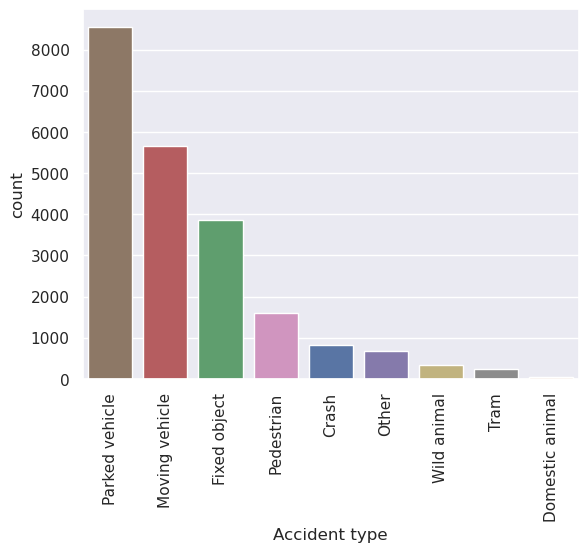

In [9]:
ax = sns.countplot(
    data=df,
    x="accident_type_label",
    order=df["accident_type_label"].value_counts().index,
    hue="accident_type_label"
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='Accident type')


The accident type (p6) feature defines the general category of a traffic accident.
Depending on the accident type, additional features provide a more detailed description:

 - For collisions involving moving vehicles, the accident is further classified using p7 (collision type), which distinguishes between frontal, side, from-side, and rear collisions.

 - For collisions with fixed objects, the accident is further described by p8 (fixed obstacle type), including trees, poles or utility structures, bollards or sign posts, guardrails, vehicle-related obstacles, walls or bridge structures, railway crossing barriers, construction obstacles, and other fixed obstacles.

 - For collisions with animals, the accident is further described by p8a (animal type) 

In [9]:
df[
  (df["accident_type_label"] == "Moving vehicle")
  &
  (df["collision_type_label"] == "N/A")
]

,id,road_category,road_number,date,time,accident_type,collision_type,fixed_obstacle_type,accident_character,responsibility,...,animal_type,drugs_at_driver,x,y,geom,geog,locality_type_label,accident_type_label,collision_type_label,fixed_obstacle_type_label


In [17]:
df[
  (df["accident_type_label"] == "Fixed object")
  &
  (df["fixed_obstacle_type_label"] == "N/A")
]

,id,road_category,road_number,date,time,accident_type,collision_type,fixed_obstacle_type,accident_character,responsibility,...,animal_type,drugs_at_driver,x,y,geom,geog,locality_type_label,accident_type_label,collision_type_label,fixed_obstacle_type_label


Number of Accidents resulted Injuries or fatalities is 6180, with Material Damage only is 15625

In [4]:
df["accident_character_label"].value_counts()

accident_character_label
Material Damage Only    15625
Injury/Fatality          6180
Name: count, dtype: int64

[Text(0.5, 0, 'Accident character')]

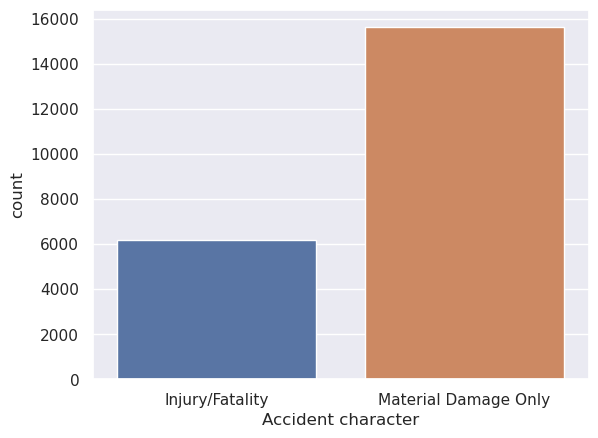

In [8]:
ax = sns.countplot(data=df, x="accident_character_label", hue="accident_character_label")
ax.set(xlabel='Accident character')

Approximately half of the accidents lack information on the driver’s alcohol level (11,065 cases).
Among the remaining 10,740 accidents with available data, 1,174 involved alcohol, while 9,566 did not.
Overall, alcohol was detected in approximately 10.9% of all recorded accidents.

In [31]:
has_data_on_alcohol = len(df[~df["driver_alcohol_detected"].isnull()])
print(has_data_on_alcohol)

10740


In [28]:
no_alcohol_len = len(df[df["driver_alcohol_detected"] == 0])
print(no_alcohol_len)

9566


In [29]:
alcohol_len = len(df[df["driver_alcohol_detected"] == 1])
print(alcohol_len)

1174


In [32]:
alcohol_len / has_data_on_alcohol

0.10931098696461825

/tmp/ipykernel_27993/3582889128.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Alcohol not detected", "Alcohol detected"])


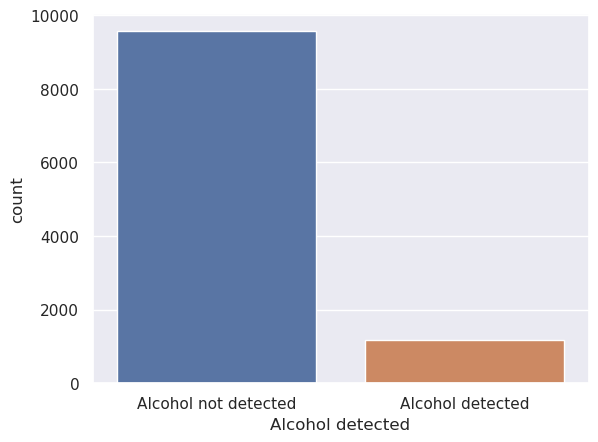

In [12]:
ax = sns.countplot(data=df, x="driver_alcohol_detected", hue="driver_alcohol_detected")
ax.set(xlabel='Alcohol detected')
ax.set_xticklabels(["Alcohol not detected", "Alcohol detected"])
ax.legend_.remove()

/tmp/ipykernel_27993/2260243032.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["0 to 0.24%", "0.24% to 0.5%",


[Text(0, 0, '0 to 0.24%'),
 Text(1, 0, '0.24% to 0.5%'),
 Text(2, 0, '0.5% to 0.8%'),
 Text(3, 0, '0.8% to 1.0%'),
 Text(4, 0, '1.0% to 1.5%'),
 Text(5, 0, '1.5%+'),
 Text(6, 0, 'No Alcohol'),
 Text(7, 0, 'Not Tested'),
 Text(8, 0, 'Refused'),
 Text(9, 0, 'Unknown')]

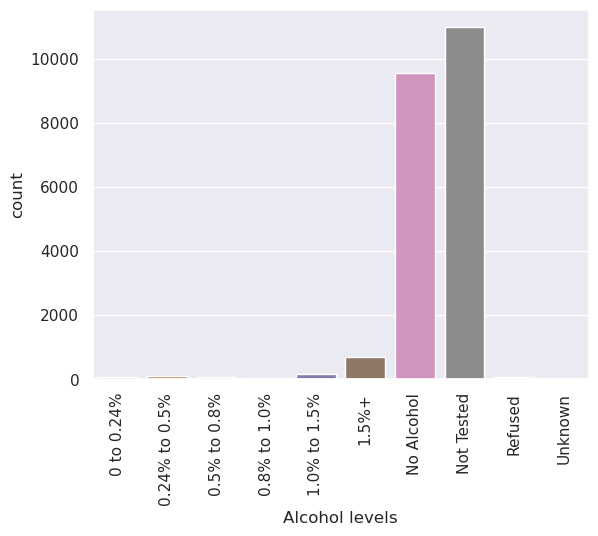

In [ ]:
ax = sns.countplot(data=df, x="driver_alcohol_level", hue="driver_alcohol_level")
ax.set(xlabel='Alcohol levels')
ax.set_xticklabels(["0 to 0.24%", "0.24% to 0.5%", 
                    "0.5% to 0.8%", "0.8% to 1.0%",
                    "1.0% to 1.5%", "1.5%+", "No Alcohol",
                    "Not Tested", "Refused", "Unknown"], rotation=90)

/tmp/ipykernel_27993/1930689377.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


[Text(0, 0, '0-0.24'),
 Text(1, 0, '0.24-0.5'),
 Text(2, 0, '0.5-0.8'),
 Text(3, 0, '0.8-1.0'),
 Text(4, 0, '1.0-1.5'),
 Text(5, 0, '1.5+'),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, '')]

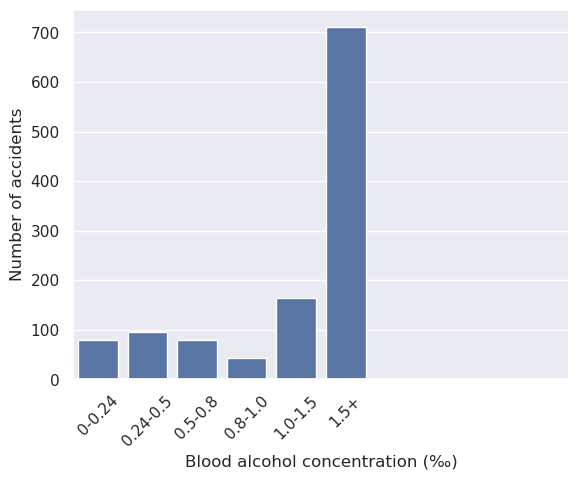

In [ ]:
with_alcohol_df = df[df["driver_alcohol_detected"] == 1]

ax = sns.countplot(
    data=with_alcohol_df,
    x="driver_alcohol_level"
)

ax.set(
    xlabel="Blood alcohol concentration (‰)",
    ylabel="Number of accidents"
)

ax.set_xticklabels(
    ["0-0.24", "0.24-0.5", "0.5-0.8", "0.8-1.0", "1.0-1.5", "1.5+"],
    rotation=45
)
